In [ ]:
!python -m spacy download en_core_web_md

In [ ]:
!pip install textblob

In [1]:
import pandas as pd     # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np      # linear algebra
import matplotlib.pylab as plt
import seaborn as sns

import re #used for Regular Expression 
import string
from collections import defaultdict

from collections import Counter
from datetime import datetime


from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, TweetTokenizer
from nltk.corpus import stopwords # import English stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stopwords = set(stopwords.words('english'))


import spacy

from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\perso\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
df = pd.read_csv("Palestine-Israel_tweets8.csv")

In [4]:
df

,Unnamed: 0,username,date,text,replies,reposts,likes,bookmarks,views
0,0,CoreyBrickley,2022-12-12T03:30:54.000Z,just wanna save this for posterity in case i g...,337,10953,120306,3746,0
1,1,Scepticskeptic1,2022-03-17T01:54:42.000Z,EVERYONE SHUT UP THERES A NEW MINECRAFT WOOD TYPE,919,5806,81653,1038,0
2,2,CoreyBrickley,2022-12-15T17:41:51.000Z,idk why you’d tell on yourself like this,363,3412,63139,1019,5479623
3,3,CoreyBrickley,2022-12-12T03:30:54.000Z,just wanna save this for posterity in case i g...,337,10953,120306,3746,0
4,4,Scepticskeptic1,2022-03-17T01:54:42.000Z,EVERYONE SHUT UP THERES A NEW MINECRAFT WOOD TYPE,919,5806,81653,1038,0
...,...,...,...,...,...,...,...,...,...
3617,3617,ifamericansknew,2024-01-31T22:45:20.000Z,Know the history. This was #palestinianlife un...,3,48,48,3,1265
3618,3618,IranDailyWeb,2024-01-31T21:50:22.000Z,The #Frontpage of tomorrow's #Newspaper #Gaza ...,0,0,0,0,2333
3619,3619,cgtnamerica,2024-01-31T22:21:04.000Z,Axios reports that U.S. Secretary of State Ant...,0,0,2,0,726
3620,3620,ferozwala,2024-01-31T22:59:28.000Z,\nClashes with the Israeli occupation forces a...,0,0,2,0,123


In [5]:
#df2 = df.drop(['Unnamed: 0','username','link'], axis=1)
df2 = df.drop(['Unnamed: 0','username'], axis=1)

In [6]:
df2

,date,text,replies,reposts,likes,bookmarks,views
0,2022-12-12T03:30:54.000Z,just wanna save this for posterity in case i g...,337,10953,120306,3746,0
1,2022-03-17T01:54:42.000Z,EVERYONE SHUT UP THERES A NEW MINECRAFT WOOD TYPE,919,5806,81653,1038,0
2,2022-12-15T17:41:51.000Z,idk why you’d tell on yourself like this,363,3412,63139,1019,5479623
3,2022-12-12T03:30:54.000Z,just wanna save this for posterity in case i g...,337,10953,120306,3746,0
4,2022-03-17T01:54:42.000Z,EVERYONE SHUT UP THERES A NEW MINECRAFT WOOD TYPE,919,5806,81653,1038,0
...,...,...,...,...,...,...,...
3617,2024-01-31T22:45:20.000Z,Know the history. This was #palestinianlife un...,3,48,48,3,1265
3618,2024-01-31T21:50:22.000Z,The #Frontpage of tomorrow's #Newspaper #Gaza ...,0,0,0,0,2333
3619,2024-01-31T22:21:04.000Z,Axios reports that U.S. Secretary of State Ant...,0,0,2,0,726
3620,2024-01-31T22:59:28.000Z,\nClashes with the Israeli occupation forces a...,0,0,2,0,123


<h1> Enlever les lignes dupliquer

In [7]:
df2=df2.drop_duplicates(subset=['text'])

In [8]:
df2

,date,text,replies,reposts,likes,bookmarks,views
0,2022-12-12T03:30:54.000Z,just wanna save this for posterity in case i g...,337,10953,120306,3746,0
1,2022-03-17T01:54:42.000Z,EVERYONE SHUT UP THERES A NEW MINECRAFT WOOD TYPE,919,5806,81653,1038,0
2,2022-12-15T17:41:51.000Z,idk why you’d tell on yourself like this,363,3412,63139,1019,5479623
156,2022-07-17T17:14:33.000Z,Bro anime fans gotta chill on Sakura,337,2301,27015,476,0
157,2022-12-30T23:58:13.000Z,#MLBS5Spoilers\n\nTHE TIMELINE DROWNING IN ADR...,0,17,118,4,1938
...,...,...,...,...,...,...,...
3617,2024-01-31T22:45:20.000Z,Know the history. This was #palestinianlife un...,3,48,48,3,1265
3618,2024-01-31T21:50:22.000Z,The #Frontpage of tomorrow's #Newspaper #Gaza ...,0,0,0,0,2333
3619,2024-01-31T22:21:04.000Z,Axios reports that U.S. Secretary of State Ant...,0,0,2,0,726
3620,2024-01-31T22:59:28.000Z,\nClashes with the Israeli occupation forces a...,0,0,2,0,123


<h1> Convert to date format </h1>

In [ ]:
def convert_to_date(date_str):
    try:
        # Essayer de convertir en utilisant le format 1
        return datetime.strptime(date_str, "%b %d, %Y · %I:%M %p %Z")
    except ValueError:
        try:
            # Essayer de convertir en utilisant le format 2
            return datetime.strptime(date_str, "%Y-%m-%dT%H:%M:%S.%fZ")
        except ValueError:
            # Gérer le cas où la chaîne n'est dans aucun des formats attendus
            print(f"Format de date non reconnu: {date_str}")
            return None

In [23]:
df2['date'] = df2['date'].apply(convert_to_date)

In [24]:
df2

,profile_id,date,text,comments,likes,quotes,retweets
0,1712776952593924096,2023-10-16 04:35:00,The Difference❗ Between War Vs Genocide❗ #Isr...,3,5,0,1
1,1712776952593924096,2023-10-16 04:31:00,🇵🇸🇮🇱🚨 Brave Palestinian lady documenting the o...,0,0,0,0
2,1712776952593924096,2023-10-16 04:31:00,A child from Palestine says what happened to h...,1,1,0,0
3,1712776952593924096,2023-10-16 04:30:00,"No, this devastation is not caused by the eart...",0,2,0,0
4,1712776952593924096,2023-10-16 04:30:00,BREAKING! Israeli warplanes have been continuo...,0,0,0,1
...,...,...,...,...,...,...,...
4770,1752382749153927168,2023-10-07 14:33:00,Such language from the U.K. government and oth...,608,11402,133,3209
4771,1714526492258975744,2023-10-07 13:53:00,President Mahmoud Abbas chairs an emergency le...,2,14,0,3
4772,1714526492258975744,2023-10-07 12:49:00,"Israeli warplanes attack #Gaza, according to l...",3,19,0,5
4773,1714526492258975744,2023-10-07 12:24:00,"Peace requires justice, freedom and independen...",0,5,0,0


In [25]:
df3 = df2.drop(['date','text'],axis=1)
df3['year']=df2['date'].dt.year
df3['month']=df2['date'].dt.month
df3['day']=df2['date'].dt.day

In [26]:
df3

,profile_id,comments,likes,quotes,retweets,year,month,day
0,1712776952593924096,3,5,0,1,2023,10,16
1,1712776952593924096,0,0,0,0,2023,10,16
2,1712776952593924096,1,1,0,0,2023,10,16
3,1712776952593924096,0,2,0,0,2023,10,16
4,1712776952593924096,0,0,0,1,2023,10,16
...,...,...,...,...,...,...,...,...
4770,1752382749153927168,608,11402,133,3209,2023,10,7
4771,1714526492258975744,2,14,0,3,2023,10,7
4772,1714526492258975744,3,19,0,5,2023,10,7
4773,1714526492258975744,0,5,0,0,2023,10,7


In [27]:
df2["text"].values

array(['The Difference❗ Between War Vs Genocide❗  #Israel has killed in 8 days 614 children  in #Gaza according to UN   Where #Russia killed 554 children in 596 days   The Difference of Rate❗ - Russia 0.9 per day - Israel 76.7 per day   #PalestineGenocide #IsrealPalestineconflict',
       '🇵🇸🇮🇱🚨 Brave Palestinian lady documenting the ongoing war crimes committed by #Israel in #Gaza including the usage of white phosphorus .  #HamasTerrorist #hamas #IsraelPalestineConflict #GazzeUnderAttack #PalestineGenocide https://nitter.net/Sa91af/status/1713726867046326719/video/1',
       'A child from Palestine says what happened to him and his family, that the criminal Zionist entity killed them and he was beaten by them.  #GazzeUnderAttack #Isarael #palastine #PalestineGenocide #GazaCity https://nitter.net/H80583330/status/1713721430318133483/video/1',
       ...,
       'Israeli warplanes attack #Gaza, according to local sources #Palestine',
       'Peace requires justice, freedom and independe

<h1>Cleaning text functions

In [28]:
# Remove all emojis, replace by EMOJI
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

test = "Oh non 😔 je suis triste ..."
print(remove_emoji(test))

Oh non  je suis triste ...


In [29]:
# Remove @ and mention, replace by USER
def remove_mention(text):
    at=re.compile(r'@\S+')
    return at.sub(r'',text)

test = "Je mentionne @me ok"
print(remove_mention(test))

Je mentionne  ok


In [30]:
# Remove numbers, replace it by NUMBER
def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'', text)

print(remove_number("13.5"))

In [31]:
# Remove all URLs, replace by URL
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

test = "Coucou, venez sur https://www.youtube.com/"
print(remove_URL(test))

Coucou, venez sur 


In [32]:
# Factorize repeated punctuation, add REPEAT
def remove_repeat_punct(text):
    rep = re.compile(r'([!?.]){2,}')
    return rep.sub(r'\1', text)

print(remove_repeat_punct("!!!!"))

!


In [33]:
# Factorize elongated words, add ELONG
def remove_elongated_words(text):
    rep = re.compile(r'\b(\S*?)([a-z])\2{2,}\b')
    return rep.sub(r'\1\2', text)

print(remove_elongated_words("yessss"))

yes


In [34]:
# Remove words in capslock, add ALLCAPS
def remove_allcaps(text):
    caps = re.compile(r'([^a-z0-9()<>\'`\-]){2,}')
    return caps.sub(r'', text)

print(remove_allcaps("AAAAHH")) # Can't find how to keep the word in downcase ...

In [35]:
# Remove all english stopwords
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords)])
    return text

test = "i am an happy man "
print(remove_stopwords(test))

happy man


In [36]:
# Remove all punctuations
def remove_all_punct(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)

test = "Ceci est, un message ! avec de la . ponctuation " " random "
print(remove_all_punct(test))

Ceci est un message  avec de la  ponctuation  random 


In [37]:
# Remove punctuations
def remove_punct(text):
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" 
    for p in punctuations:
        text = text.replace(p, f' {p} ')

    text = text.replace('...', ' ... ')
    if '...' not in text:
        text = text.replace('..', ' ... ')   
    return text

In [38]:
# Remove non printable characters
def remove_not_ASCII(text):
    text = ''.join([word for word in text if word in string.printable])
    return text

In [39]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(text):
    data=text.split(' ')
    data2 = [lemmatizer.lemmatize(word) for word in data]
    text2=' '.join(data2)
    return text2

In [40]:
stemmer = PorterStemmer()
def stemming(text):
    data=text.split(' ')
    data2 = [stemmer.stem(word) for word in data]
    text2=' '.join(data2)
    return text2

In [41]:
words_model = ['israeli','israelis','lsrael','endisraelsgenocide','palestinian','palestinians','gazaunderattack']
model_language = {'israel':['israeli','israelis','lsrael','endisraelsgenocide'],
                  'palestine':['palestinian','palestinians'],
                 'gaza':['gazaunderattack']}
def clean_lemma(text):
    data = text.split(' ')
    n=len(data)
    i=0
    while i < n:
        if len(data[i])<=2:
            data.pop(i)
            n-=1
        elif data[i] in words_model:
            for key,value in model_language.items():
                if data[i] in value:
                    data[i]=key
                    i+=1
                    break
        else:
            i+=1
    text = ' '.join(data)
    return text

In [42]:
# Load the spaCy English model
nlp = spacy.load('en_core_web_md')
 
# Define a sample text
text = "The quick brown foxes are jumping over the lazy dogs."
 
# Process the text using spaCy
doc = nlp(text)
 
# Extract lemmatized tokens
lemmatized_tokens = [token.lemma_ for token in doc]
 
# Join the lemmatized tokens into a sentence
lemmatized_text = ' '.join(lemmatized_tokens)
 
# Print the original and lemmatized text
print("Original Text:", text)
print("Lemmatized Text:", lemmatized_text)

Original Text: The quick brown foxes are jumping over the lazy dogs.
Lemmatized Text: the quick brown fox be jump over the lazy dog .


In [43]:
nlp = spacy.load('en_core_web_md')

def lemmatizing2(text):
    # Process the text using spaCy
    doc = nlp(text)

    # Extract lemmatized tokens
    lemmatized_tokens = [token.lemma_ for token in doc]

    # Join the lemmatized tokens into a sentence
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

In [44]:
stemmer = PorterStemmer()
# Clean text
def clean_tweet(text):
    
    # Remove non text
    text = remove_URL(text)      #remove links
    text = remove_not_ASCII(text)      #remove nonsense character
    
    # Lower text, replace abbreviations
    text = text.lower()          #replace all word to lower
    text = remove_mention(text)  #remove @--
    text = remove_number(text)   #remove numbers
    
    # Remove emojis / smileys
    text = remove_emoji(text) 
    
    # Remove repeated puntuations / words
    text = remove_elongated_words(text)    #revomve word repeated like HHHHHH
    text = remove_repeat_punct(text)       #remove repeated punctuation

    text = remove_all_punct(text)          #remove punctuation
    text = remove_punct(text)              #remove other punctuation
    text = remove_stopwords(text)          #remove basic words like (and,or,...)
    
    #Stemming or Lemmatization
    text = lemmatizing2(text)               #replace words to simple (infinitif , singular, ...)
    #text = stemming(text)                  #remove last letters
    
    #My methode of lemmatization
    text =clean_lemma(text)

    return text

In [45]:
df3['text'] = df2['text'].apply(clean_tweet)
df3['text'][2500] #Cleaned text data_tweet

'want shani louk remembered never forget shani may memory blessing'

In [194]:
df3['text'] = df2['text'].apply(clean_tweet)

In [46]:
texts=''
for text in df3['text']:
    texts=texts+' '+text
test = texts.split(' ')
c=Counter(test)
c.most_common(200)

[('israel', 2187),
 ('gaza', 1906),
 ('palestine', 1147),
 ('ukraine', 719),
 ('hamas', 546),
 ('kill', 491),
 ('day', 485),
 ('people', 418),
 ('russia', 394),
 ('say', 364),
 ('child', 343),
 ('not', 338),
 ('one', 324),
 ('today', 318),
 ('hostage', 304),
 ('iran', 285),
 ('russian', 278),
 ('war', 275),
 ('attack', 273),
 ('family', 265),
 ('world', 261),
 ('hospital', 259),
 ('terrorist', 250),
 ('force', 249),
 ('october', 247),
 ('kyiv', 239),
 ('genocide', 223),
 ('break', 221),
 ('take', 220),
 ('call', 215),
 ('home', 213),
 ('international', 208),
 ('aid', 198),
 ('hold', 197),
 ('woman', 192),
 ('support', 190),
 ('ambassador', 184),
 ('civilian', 179),
 ('report', 178),
 ('state', 175),
 ('must', 171),
 ('time', 162),
 ('murder', 161),
 ('year', 159),
 ('bomb', 155),
 ('military', 152),
 ('president', 152),
 ('humanitarian', 152),
 ('right', 151),
 ('every', 150),
 ('ceasefire', 150),
 ('use', 147),
 ('continue', 145),
 ('foreign', 145),
 ('include', 143),
 ('zionist', 141

<h1> Sentiment polarity with textBlob

In [47]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [48]:
df3['sentiment_polarity']=df3['text'].apply(polarity)

In [49]:
def sentiment(label):
    if label <0:
        return -1
    elif label ==0:
        return 0
    elif label>0:
        return 1

In [50]:
df3['sentiment']=df3['sentiment_polarity'].apply(sentiment)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

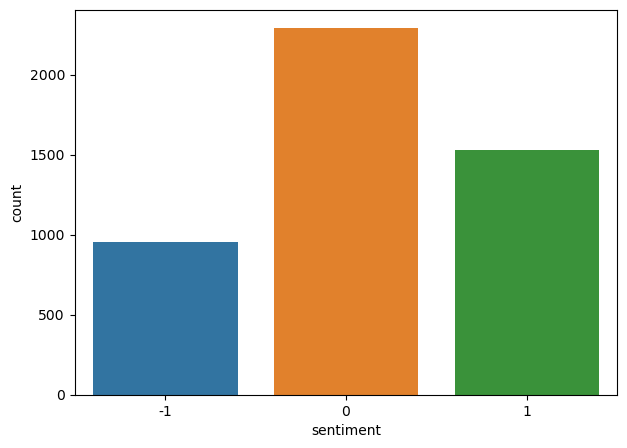

In [51]:
fig = plt.figure(figsize=(7,5))
sns.countplot(x="sentiment",data=df3)

<h1> Convert text to features

In [52]:
def create_feature_occurrence_table(comments, features):
    # Initialize an empty dictionary to store the feature counts
    feature_counts = {}

    # Iterate over each feature
    for feature in features:
        # Initialize an empty list to store the occurrence counts for the feature
        counts = []

        # Iterate over each comment
        for comment in comments:
            # Count the occurrences of the feature in the comment
            count = comment.count(feature)
            # Append the count to the list
            counts.append(count)

        # Store the list of counts in the feature_counts dictionary
        feature_counts[feature] = counts

    # Create a DataFrame from the feature_counts dictionary
    df = pd.DataFrame(feature_counts)

    # Return the DataFrame
    return df

In [61]:
Most2 = c.most_common(200)
df3

,profile_id,comments,likes,quotes,retweets,year,month,day,text,sentiment_polarity,sentiment
0,1712776952593924096,3,5,0,1,2023,10,16,difference war genocide israel kill day childr...,0.000000,0
1,1712776952593924096,0,0,0,0,2023,10,16,brave palestine lady document ongoing war crim...,0.400000,1
2,1712776952593924096,1,1,0,0,2023,10,16,child palestine say happen family criminal zio...,-0.400000,-1
3,1712776952593924096,0,2,0,0,2023,10,16,devastation cause earthquake israel cause deva...,0.500000,1
4,1712776952593924096,0,0,0,1,2023,10,16,break israel warplane continuously bomb severa...,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
4770,1752382749153927168,608,11402,133,3209,2023,10,7,language government international actor escala...,0.114286,1
4771,1714526492258975744,2,14,0,3,2023,10,7,president mahmoud abbas chairs emergency leade...,0.000000,0
4772,1714526492258975744,3,19,0,5,2023,10,7,israel warplanes attack gaza accord local sour...,0.000000,0
4773,1714526492258975744,0,5,0,0,2023,10,7,peace require justice freedom independence pal...,0.175000,1


In [62]:
columns=[]
for i in Most:
    columns.append(i[0])

In [63]:
texts=list(df3['text'])

In [64]:
create_feature_occurrence_table(texts,columns)

,israel,gaza,palestine,ukraine,hamas,kill,day,people,russia,say,...,can,safe,hear,source,weapon,statement,camp,sexual,near,fight
0,2,1,2,0,0,2,4,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,3,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2,2,2,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,4,0,2,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4771,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4772,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4773,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df_occurrence=create_feature_occurrence_table(C,B)
df_occurrence

,israel,gaza,palestine,ukraine,hamas,kill,day,people,russia,say,...,can,safe,hear,source,weapon,statement,camp,sexual,near,fight
0,2,1,2,0,0,2,4,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,3,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2,2,2,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,4,0,2,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4771,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4772,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4773,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df4 = df3.drop(['text','sentiment_polarity','sentiment'],axis=1)
df_sentiment = df3[['sentiment_polarity','sentiment']]
df_sentiment

,sentiment_polarity,sentiment
0,0.000000,0
1,0.400000,1
2,-0.400000,-1
3,0.500000,1
4,0.000000,0
...,...,...
4770,0.114286,1
4771,0.000000,0
4772,0.000000,0
4773,0.175000,1


In [74]:
columns = df4.columns
columns

Index(['profile_id', 'comments', 'likes', 'quotes', 'retweets', 'year',
       'month', 'day'],
      dtype='object')

In [75]:
df_cleaned = pd.concat([df4,df_occurrence,df_sentiment] , axis=1)

In [76]:
df_cleaned

,profile_id,comments,likes,quotes,retweets,year,month,day,israel,gaza,...,hear,source,weapon,statement,camp,sexual,near,fight,sentiment_polarity,sentiment
0,1712776952593924096,3,5,0,1,2023,10,16,2,1,...,0,0,0,0,0,0,0,0,0.000000,0
1,1712776952593924096,0,0,0,0,2023,10,16,2,1,...,0,0,0,0,0,0,0,0,0.400000,1
2,1712776952593924096,1,1,0,0,2023,10,16,0,1,...,0,0,0,0,0,0,0,0,-0.400000,-1
3,1712776952593924096,0,2,0,0,2023,10,16,2,2,...,0,0,0,0,0,0,0,0,0.500000,1
4,1712776952593924096,0,0,0,1,2023,10,16,1,4,...,0,0,0,0,0,0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,1752382749153927168,608,11402,133,3209,2023,10,7,4,0,...,0,0,0,1,0,0,0,0,0.114286,1
4771,1714526492258975744,2,14,0,3,2023,10,7,0,0,...,0,0,0,0,0,0,0,0,0.000000,0
4772,1714526492258975744,3,19,0,5,2023,10,7,1,1,...,0,1,0,0,0,0,0,0,0.000000,0
4773,1714526492258975744,0,5,0,0,2023,10,7,0,0,...,0,0,0,0,0,0,0,0,0.175000,1


<h1> Enlever les lignes dont les occurences sont tous nulls

In [82]:
df_filtered = df_cleaned.loc[~(df_cleaned.iloc[:,8:-2] == 0).all(axis=1)]
df_filtered

,profile_id,comments,likes,quotes,retweets,year,month,day,israel,gaza,...,hear,source,weapon,statement,camp,sexual,near,fight,sentiment_polarity,sentiment
0,1712776952593924096,3,5,0,1,2023,10,16,2,1,...,0,0,0,0,0,0,0,0,0.000000,0
1,1712776952593924096,0,0,0,0,2023,10,16,2,1,...,0,0,0,0,0,0,0,0,0.400000,1
2,1712776952593924096,1,1,0,0,2023,10,16,0,1,...,0,0,0,0,0,0,0,0,-0.400000,-1
3,1712776952593924096,0,2,0,0,2023,10,16,2,2,...,0,0,0,0,0,0,0,0,0.500000,1
4,1712776952593924096,0,0,0,1,2023,10,16,1,4,...,0,0,0,0,0,0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,1752382749153927168,608,11402,133,3209,2023,10,7,4,0,...,0,0,0,1,0,0,0,0,0.114286,1
4771,1714526492258975744,2,14,0,3,2023,10,7,0,0,...,0,0,0,0,0,0,0,0,0.000000,0
4772,1714526492258975744,3,19,0,5,2023,10,7,1,1,...,0,1,0,0,0,0,0,0,0.000000,0
4773,1714526492258975744,0,5,0,0,2023,10,7,0,0,...,0,0,0,0,0,0,0,0,0.175000,1


In [77]:
df_cleaned.to_csv("Palestine-Israel_tweets_cleaned.csv")